In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
df = pd.read_csv('ClientsData.csv')
# Display the first few rows of the DataFrame
print(df.head())

   AGE  SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL  GENDER  CHILD_TOTAL  DEPENDANTS  \
0   49                  1                  0       1            2           1   
1   32                  1                  0       1            3           3   
2   52                  1                  0       1            4           0   
3   39                  1                  0       1            1           1   
4   30                  1                  0       0            0           0   

   PERSONAL_INCOME  LOAN_NUM_TOTAL  LOAN_NUM_CLOSED  LOAN_DLQ_NUM  TARGET  
0           5000.0               1                1             2       0  
1          12000.0               1                1             1       0  
2           9000.0               2                1             0       0  
3          25000.0               1                1             3       0  
4          12000.0               2                1             2       0  


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGE                15223 non-null  int64  
 1   SOCSTATUS_WORK_FL  15223 non-null  int64  
 2   SOCSTATUS_PENS_FL  15223 non-null  int64  
 3   GENDER             15223 non-null  int64  
 4   CHILD_TOTAL        15223 non-null  int64  
 5   DEPENDANTS         15223 non-null  int64  
 6   PERSONAL_INCOME    15223 non-null  float64
 7   LOAN_NUM_TOTAL     15223 non-null  int64  
 8   LOAN_NUM_CLOSED    15223 non-null  int64  
 9   LOAN_DLQ_NUM       15223 non-null  int64  
 10  TARGET             15223 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.3 MB


Датасет подготовлен - все данные числовые, это замечательно. Пропущенных значений так же нет.

In [12]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (2819, 11)


In [13]:
# Удаление дубликатов

df = df.drop_duplicates()

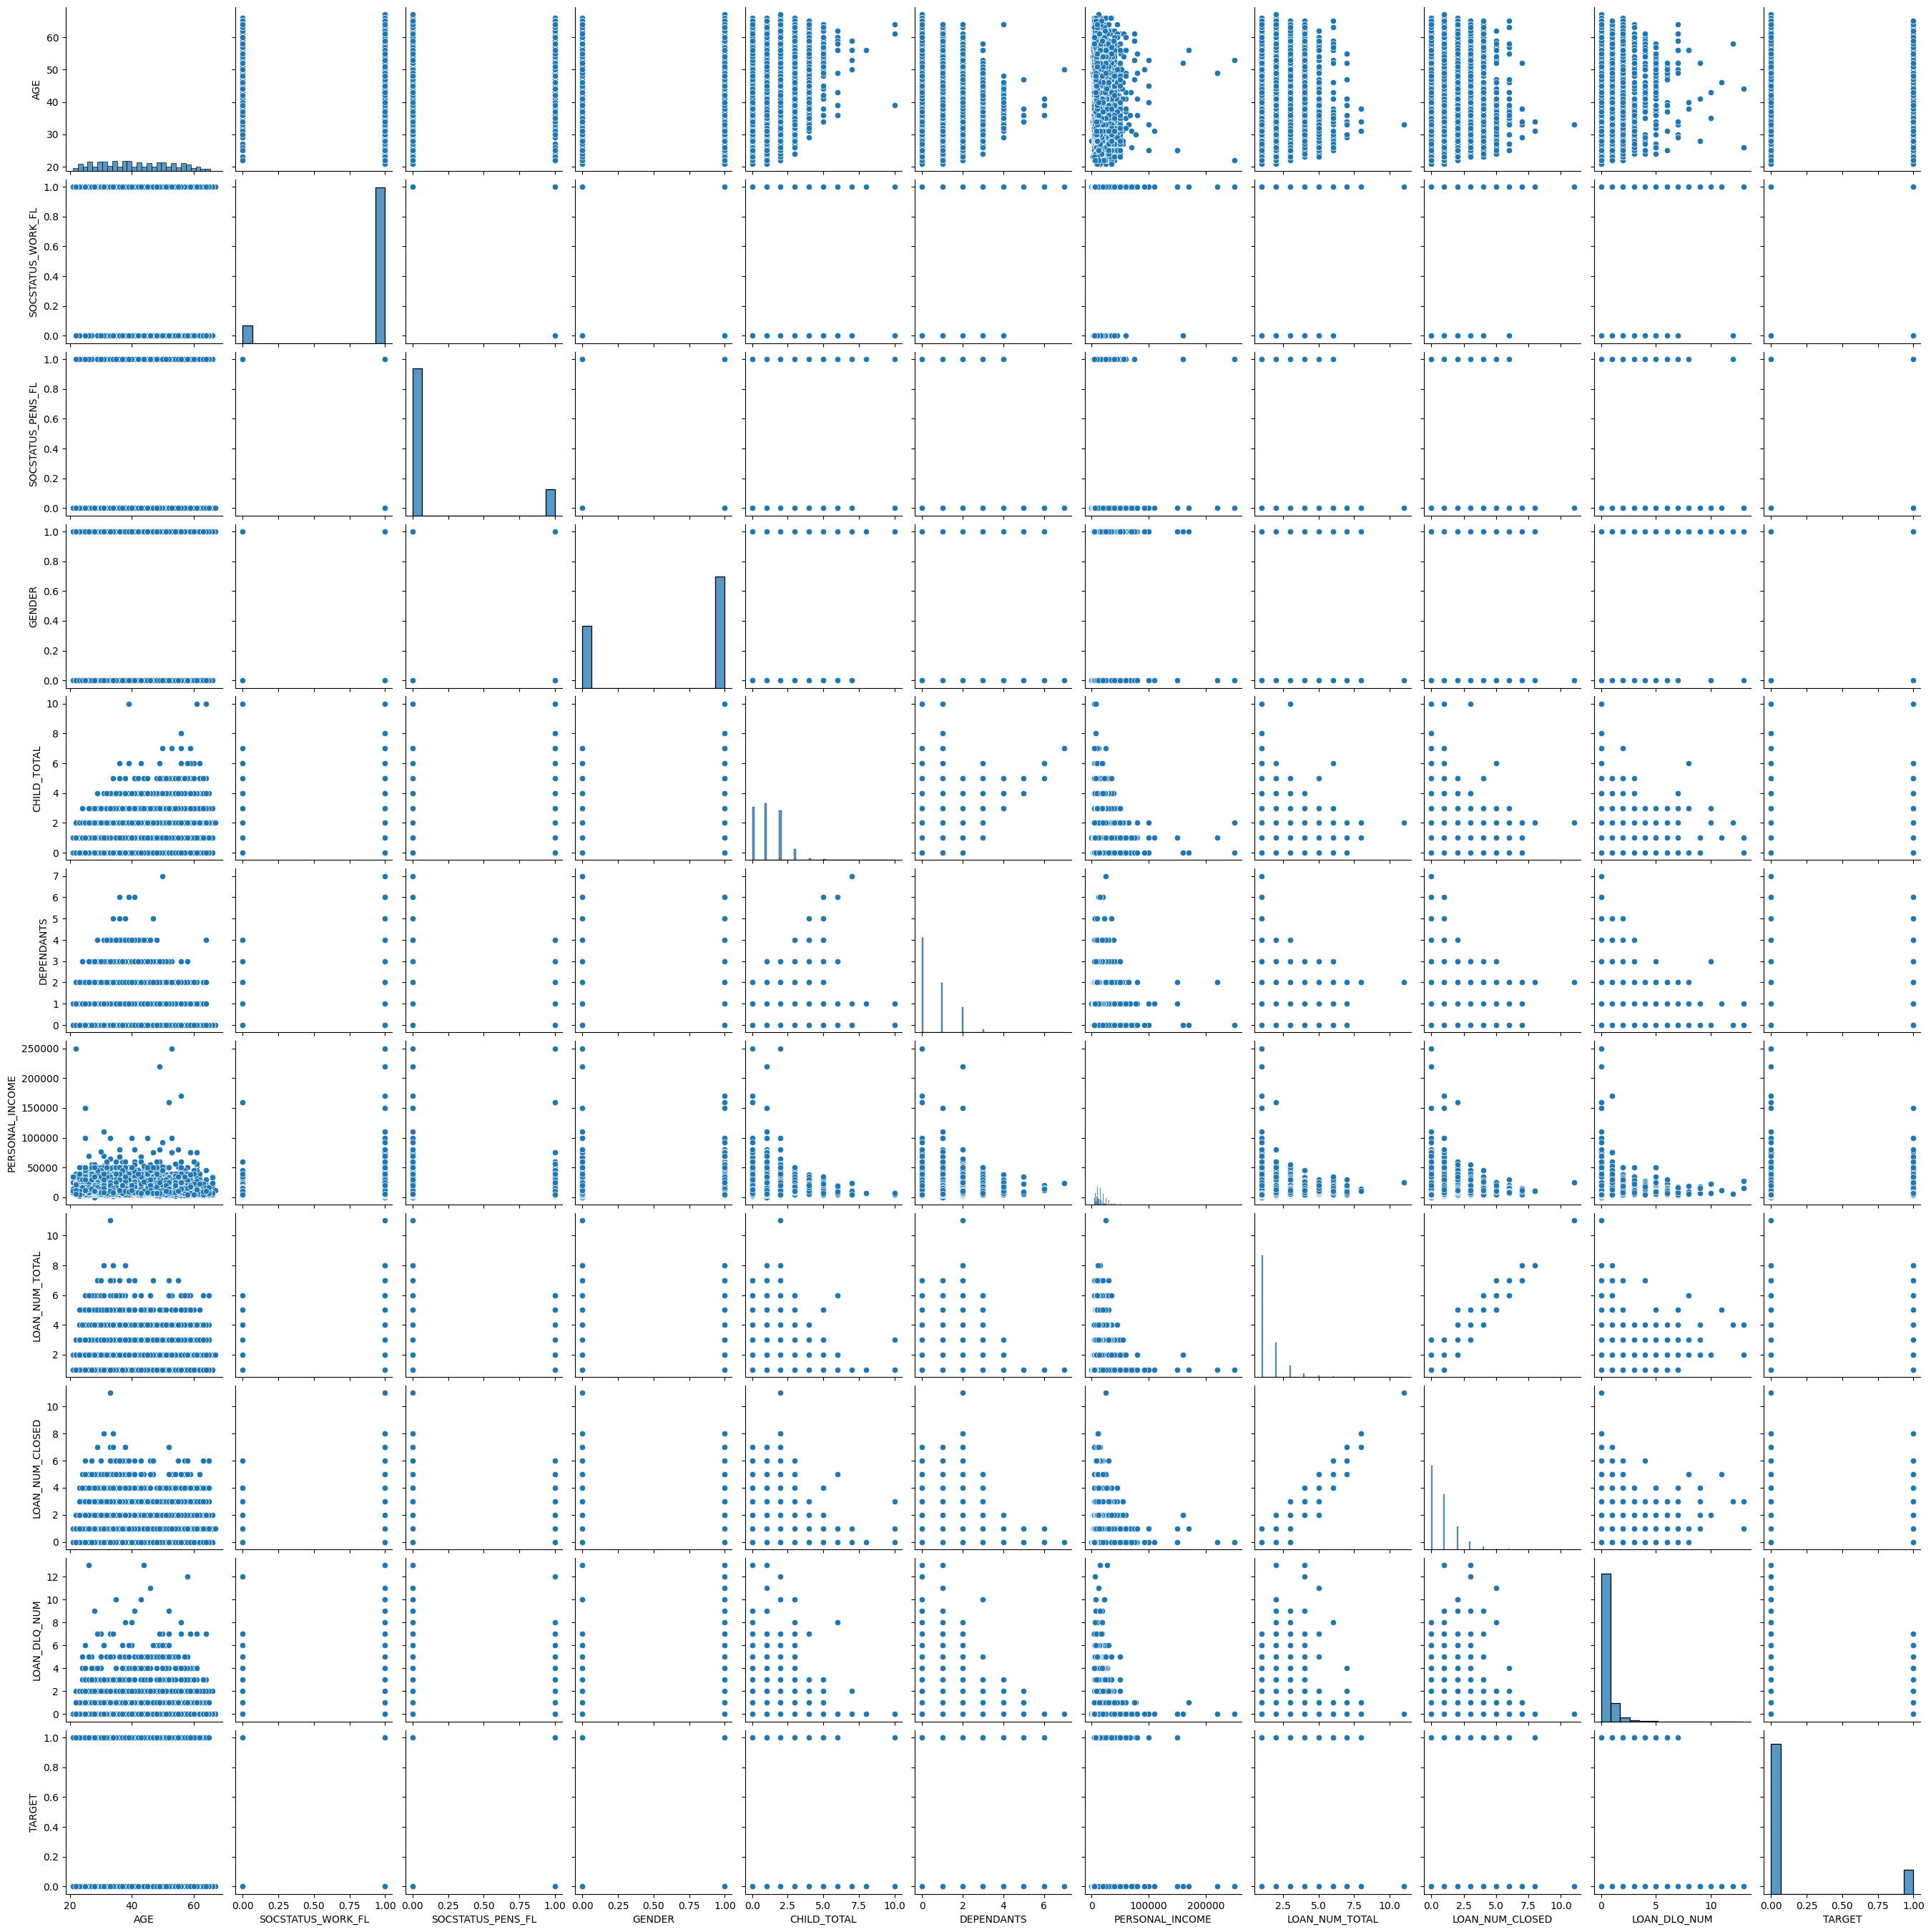

In [14]:
sns.pairplot(df)

In [15]:
df.describe()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
count,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000
mean,41.456304,0.899065,0.153096,0.643099,1.163254,0.655353,14106.510025,1.456546,0.829329,0.233957,0.137778
std,11.541404,0.301255,0.360094,0.479105,1.025295,0.833935,9620.496226,0.851157,1.039791,0.749805,0.344681
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,1.000000,0.000000,0.000000,0.000000
50%,41.000000,1.000000,0.000000,1.000000,1.000000,0.000000,12000.000000,1.000000,1.000000,0.000000,0.000000
75%,51.000000,1.000000,0.000000,1.000000,2.000000,1.000000,17000.000000,2.000000,1.000000,0.000000,0.000000
max,67.000000,1.000000,1.000000,1.000000,10.000000,7.000000,250000.000000,11.000000,11.000000,13.000000,1.000000


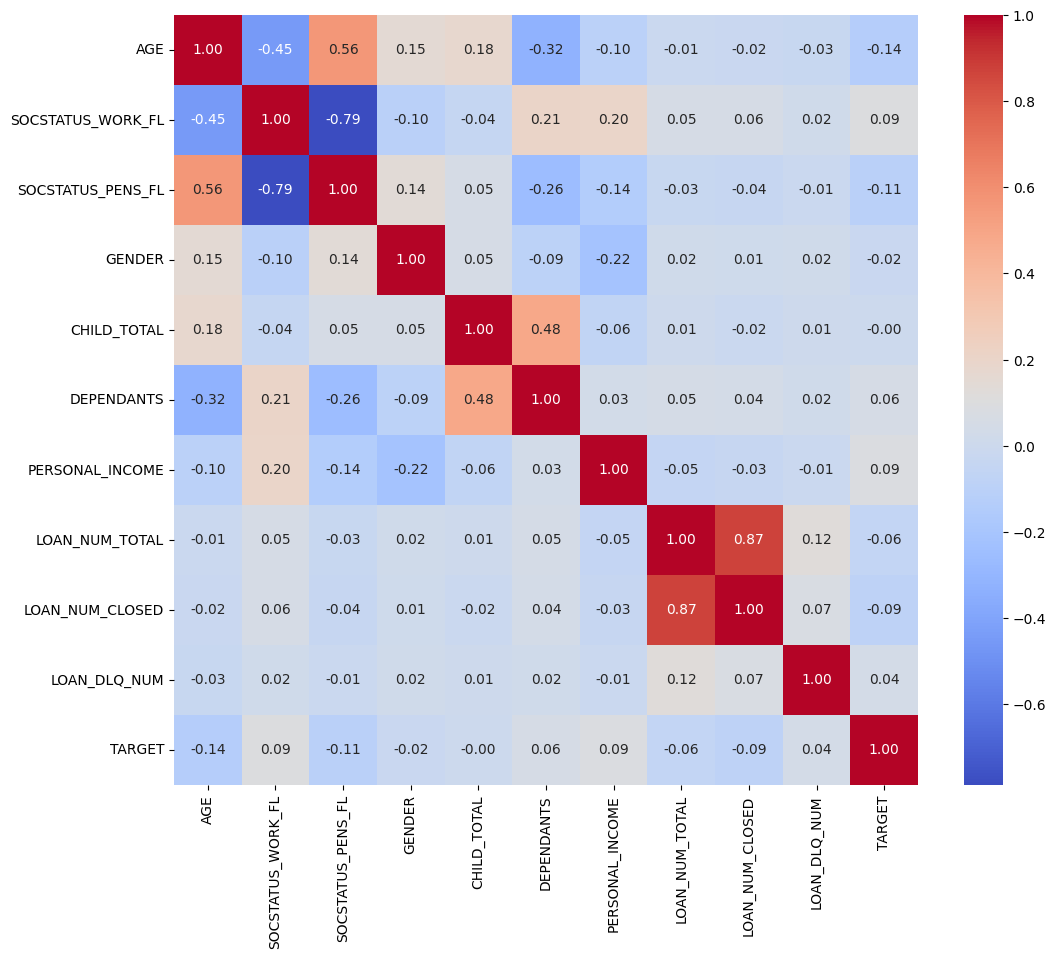

In [16]:
corr_matrix = df.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Целевая переменная слабо кореллирует с остальными атрибуиами - это плохо.

В датасете есть взаимнозависимые атрибуты, такие как возраст, наличие пенсии, статус занятости, Иждивенцы и дети. Количество ссуд, количество погашенных ссуд.

Кроме того датасет плохо сбалансирован относительно целевой переменной

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12404 entries, 0 to 15222
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGE                12404 non-null  int64  
 1   SOCSTATUS_WORK_FL  12404 non-null  int64  
 2   SOCSTATUS_PENS_FL  12404 non-null  int64  
 3   GENDER             12404 non-null  int64  
 4   CHILD_TOTAL        12404 non-null  int64  
 5   DEPENDANTS         12404 non-null  int64  
 6   PERSONAL_INCOME    12404 non-null  float64
 7   LOAN_NUM_TOTAL     12404 non-null  int64  
 8   LOAN_NUM_CLOSED    12404 non-null  int64  
 9   LOAN_DLQ_NUM       12404 non-null  int64  
 10  TARGET             12404 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.1 MB


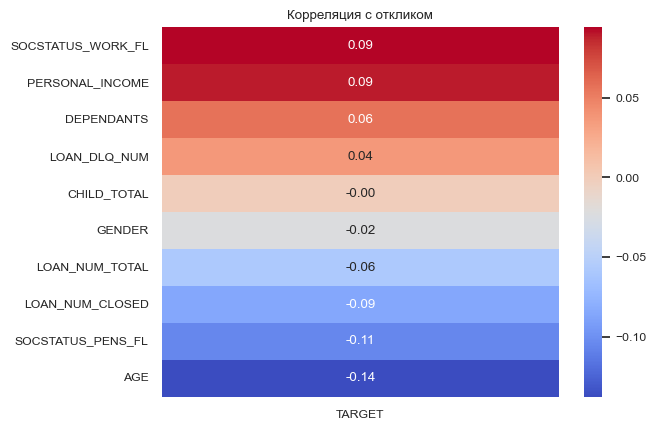

In [18]:
corr = df.corr()
target_corr = corr['TARGET'].drop('TARGET')

target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корреляция с откликом')
plt.show()

**Строим модель бинарной классификации**

Сначала построим, обучим и протетсируем модель линейной регрессии без балансирования классов

In [20]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression

In [21]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test1)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


# Оценка MSE и MAE

mse = mean_squared_error(y_test, predictions)

mae = mean_absolute_error(y_test, predictions)


print("Mean Squared Error (MSE):", mse)

print("Mean Absolute Error (MAE):", mae)

Accuracy: 0.8625554212011286
Mean Squared Error (MSE): 0.13744457879887143
Mean Absolute Error (MAE): 0.13744457879887143


c:\Users\Klimov_as\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Алгоритм не сошёлся - Нужно масштабирование данных из-за разбаллансировки

In [22]:
from sklearn.preprocessing import StandardScaler

X = df.drop('TARGET', axis=1)
y = df['TARGET']
# Масштабирование данных
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)  # Увеличим значение числа итераций

model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


# Оценка MSE и MAE

mse = mean_squared_error(y_test, predictions)

mae = mean_absolute_error(y_test, predictions)


print("Mean Squared Error (MSE):", mse)

print("Mean Absolute Error (MAE):", mae)

Accuracy: 0.8625554212011286
Mean Squared Error (MSE): 0.13744457879887143
Mean Absolute Error (MAE): 0.13744457879887143


Мы применили масштабирование данных, тем самым преобразовав их таким образом, чтобы они имели нулевое среднее значение и единичное стандартное отклонение.
Алгоритм сошёлся, выдав нам  хорошие показатели точности и погрешностей.

**А теперь попробуем улучшить модель**

In [23]:
import pandas as pd

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

X = df.drop('TARGET', axis=1)
y = df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

importance = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
top_features = feature_importance.reindex(feature_importance['Importance'].abs().sort_values(ascending=False).index).head(5)
print(top_features)

             Feature  Importance
2  SOCSTATUS_PENS_FL   -0.358381
8    LOAN_NUM_CLOSED   -0.324899
4        CHILD_TOTAL    0.206061
5         DEPENDANTS   -0.150835
3             GENDER   -0.094135


c:\Users\Klimov_as\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.feature_selection import SelectKBest, f_classif
# Выбор 5 лучших признаков
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
# Получение индексов выбранных признаков
selected_indices = selector.get_support(indices=True)
# Создание DataFrame для удобства
top_features_selectkbest = pd.DataFrame({'Feature': X.columns[selected_indices], 'Score': selector.scores_[selected_indices]})
print(top_features_selectkbest)

             Feature       Score
0                AGE  239.606105
1  SOCSTATUS_WORK_FL  111.367288
2  SOCSTATUS_PENS_FL  139.992427
3    PERSONAL_INCOME  100.647688
4    LOAN_NUM_CLOSED   90.489088


Мы применили два подхода к выявлению наиболее значимых критериев датасета, попробуем обучить и проверить работу линейной регрессии на топ-5 важных коритериях

In [25]:
from sklearn.preprocessing import StandardScaler

X = df[['SOCSTATUS_PENS_FL','LOAN_NUM_CLOSED',  'CHILD_TOTAL','DEPENDANTS','GENDER']]  # Выбираем признаки
y = df['TARGET']
# Масштабирование данных
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model1 = LogisticRegression(max_iter=200)  # Увеличим значение числа итераций

model1.fit(X_train, y_train)

predictions = model1.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


# Оценка MSE и MAE

mse = mean_squared_error(y_test, predictions)

mae = mean_absolute_error(y_test, predictions)


print("Mean Squared Error (MSE):", mse)

print("Mean Absolute Error (MAE):", mae)

Accuracy: 0.8633615477629988
Mean Squared Error (MSE): 0.13663845223700122
Mean Absolute Error (MAE): 0.13663845223700122


Качество модели увеличилось незначительно

In [26]:
from sklearn.preprocessing import StandardScaler

X = df[['AGE','SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL','PERSONAL_INCOME','LOAN_NUM_CLOSED']]  # в этом наборе нет детей и иждевенцев - коллинеарных признаков
y = df['TARGET']
# Масштабирование данных
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model2 = LogisticRegression(max_iter=200)  # Увеличим значение числа итераций

model2.fit(X_train, y_train)

predictions = model2.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


# Оценка MSE и MAE

mse = mean_squared_error(y_test, predictions)

mae = mean_absolute_error(y_test, predictions)


print("Mean Squared Error (MSE):", mse)

print("Mean Absolute Error (MAE):", mae)

Accuracy: 0.8625554212011286
Mean Squared Error (MSE): 0.13744457879887143
Mean Absolute Error (MAE): 0.13744457879887143


Чуть лучше чем изначальная модель, чуть хуже чем model1. Думаю на этом хватит экспериментов.